<a href="https://colab.research.google.com/github/AmiraAlaa3/Dow-Jones-Index-AI/blob/main/Dow_Jones_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Amira Alaa Al-Maghawry Mohamed**

# **Dow Jones Index **

In [ ]:
import numpy as np 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
#Scikit-learn models
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB 
# Scikit-learn metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn import metrics

In [ ]:
%matplotlib inline
filelist =['/content/AAPL.csv',"/content/DWDP.csv","/content/NKE.csv","/content/HD.csv","/content/GS.csv","/content/AXP.csv","/content/BA.csv","/content/CAT.csv","/content/CSCO.csv","/content/CVX.csv","/content/DIS.csv"]
# Load data
data = pd.read_csv('/content/AAPL.csv')

cols = ['date','open', 'high', 'low', 'close', 'volume','change']
data = data[cols].copy()

#************************************
df_stocks = pd.DataFrame()

for i in filelist:
    tmp = pd.read_csv(i)
    tmp['symbol'] = i.split('/')[-1].split('.')[0]
    df_stocks = df_stocks.append(tmp)

cols = ['date','open', 'high', 'low', 'close', 'volume', 'symbol']
df_stocks = df_stocks[cols].copy()
df_stocks['date'] = pd.to_datetime(df_stocks['date'])

# create new dataframe with just closing price for each stock
df2 = df_stocks.pivot(index='date', columns='symbol', values='close')



In [ ]:
data

,date,open,high,low,close,volume,change
0,2014-02-21,69.9727,70.2061,68.8967,68.9821,69757247,-0.774858
1,2014-02-24,68.7063,69.5954,68.6104,69.2841,72364950,0.302061
2,2014-02-25,69.5245,69.5488,68.4239,68.5631,58247350,-0.721010
3,2014-02-26,68.7667,68.9492,67.7147,67.9446,69131286,-0.618575
4,2014-02-27,67.9170,69.4457,67.7738,69.2999,75557321,1.355300
...,...,...,...,...,...,...,...
1253,2019-02-13,171.3900,172.4800,169.9200,170.1800,22490233,-0.710000
1254,2019-02-14,169.7100,171.2615,169.3800,170.8000,21835747,0.620000
1255,2019-02-15,171.2500,171.7000,169.7500,170.4200,24626814,-0.380000
1256,2019-02-19,169.7100,171.4400,169.4900,170.9300,18972826,0.510000


In [ ]:
df_stocks

,date,open,high,low,close,volume,symbol
0,2014-02-21,69.9727,70.2061,68.8967,68.9821,69757247,AAPL
1,2014-02-24,68.7063,69.5954,68.6104,69.2841,72364950,AAPL
2,2014-02-25,69.5245,69.5488,68.4239,68.5631,58247350,AAPL
3,2014-02-26,68.7667,68.9492,67.7147,67.9446,69131286,AAPL
4,2014-02-27,67.9170,69.4457,67.7738,69.2999,75557321,AAPL
...,...,...,...,...,...,...,...
1253,2019-02-13,109.2400,110.4800,109.2300,110.2000,6919706,DIS
1254,2019-02-14,109.8500,111.4950,109.5400,110.6600,6324746,DIS
1255,2019-02-15,111.4000,112.6325,111.0300,112.5900,8197250,DIS
1256,2019-02-19,112.9100,113.7700,112.8300,113.5100,8169630,DIS


In [ ]:
df2

symbol,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,NKE
date,,,,,,,,,,,
2014-02-21,68.9821,82.2720,112.8920,83.4824,18.8421,92.1690,74.6463,NaN,153.7179,69.8159,36.0905
2014-02-24,69.2841,83.3566,114.0449,83.3283,18.8335,93.3714,75.2052,NaN,155.6242,69.9326,36.7323
2014-02-25,68.5631,83.3473,111.5720,82.5491,18.5951,94.0422,74.7208,NaN,152.7648,72.7256,36.8597
2014-02-26,67.9446,83.1804,111.4224,83.2256,18.6718,94.4839,74.5997,NaN,152.6428,73.3722,37.0060
2014-02-27,69.2999,83.6996,113.1385,82.7974,18.6633,94.6311,74.9724,NaN,155.0618,73.6147,36.9302
...,...,...,...,...,...,...,...,...,...,...,...
2019-02-13,170.1800,107.5600,410.5800,133.1000,47.5000,118.3800,110.2000,53.14,194.6900,188.4100,85.4000
2019-02-14,170.8000,106.6200,409.8200,132.6200,48.4000,118.1600,110.6600,52.66,192.5300,187.7100,84.6800
2019-02-15,170.4200,107.3800,417.9700,136.2000,49.4300,119.3500,112.5900,54.24,198.5000,192.3900,85.3800


In [ ]:
missing={"missing":data.isnull().sum()," % of missing":round(((data.isnull().sum()/data.shape[0])*100),2)}
pd.DataFrame(missing)

,missing,% of missing
date,0,0.0
open,0,0.0
high,0,0.0
low,0,0.0
close,0,0.0
volume,0,0.0
change,0,0.0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1258 non-null   object 
 1   open    1258 non-null   float64
 2   high    1258 non-null   float64
 3   low     1258 non-null   float64
 4   close   1258 non-null   float64
 5   volume  1258 non-null   int64  
 6   change  1258 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [ ]:
data['date']=pd.to_datetime(data['date'])

In [ ]:
data=data.set_index("date")

In [ ]:
data.head(10)

,open,high,low,close,volume,change
date,,,,,,
2014-02-21,69.9727,70.2061,68.8967,68.9821,69757247,-0.774858
2014-02-24,68.7063,69.5954,68.6104,69.2841,72364950,0.302061
2014-02-25,69.5245,69.5488,68.4239,68.5631,58247350,-0.721010
2014-02-26,68.7667,68.9492,67.7147,67.9446,69131286,-0.618575
2014-02-27,67.9170,69.4457,67.7738,69.2999,75557321,1.355300
2014-02-28,69.4851,69.9671,68.5710,69.1121,93074653,-0.187807
2014-03-03,68.7417,69.6913,68.6616,69.3117,59667923,0.199626
2014-03-04,69.7372,69.9526,69.3130,69.7688,64884834,0.457035
2014-03-05,69.7267,70.2297,69.4916,69.9158,50065519,0.147093


In [ ]:
data.tail(10)

,open,high,low,close,volume,change
date,,,,,,
2019-02-06,173.9041,174.8201,172.1148,173.4958,28239591,0.059744
2019-02-07,171.6637,173.1971,169.6125,170.2099,31741690,-3.285900
2019-02-08,168.9900,170.6600,168.4200,170.4100,23819966,0.200085
2019-02-11,171.0500,171.2100,169.2500,169.4300,20993425,-0.980000
2019-02-12,170.1000,171.0000,169.7000,170.8900,22283523,1.460000
2019-02-13,171.3900,172.4800,169.9200,170.1800,22490233,-0.710000
2019-02-14,169.7100,171.2615,169.3800,170.8000,21835747,0.620000
2019-02-15,171.2500,171.7000,169.7500,170.4200,24626814,-0.380000
2019-02-19,169.7100,171.4400,169.4900,170.9300,18972826,0.510000


In [ ]:
data.describe()

,open,high,low,close,volume,change
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,128.601988,129.715323,127.475242,128.625531,4.130008e+07,0.081298
std,38.228897,38.589302,37.858325,38.223879,2.121789e+07,2.129084
min,67.917000,68.435700,67.153900,67.944600,1.147592e+07,-15.662800
25%,100.606200,101.521025,99.594625,100.572975,2.628193e+07,-0.725417
50%,115.902500,116.477250,114.748750,115.852050,3.590316e+07,0.068881
75%,156.815750,158.307575,155.190700,156.847525,5.031511e+07,1.041825
max,228.995300,231.664500,228.003100,230.275400,1.899781e+08,11.084400


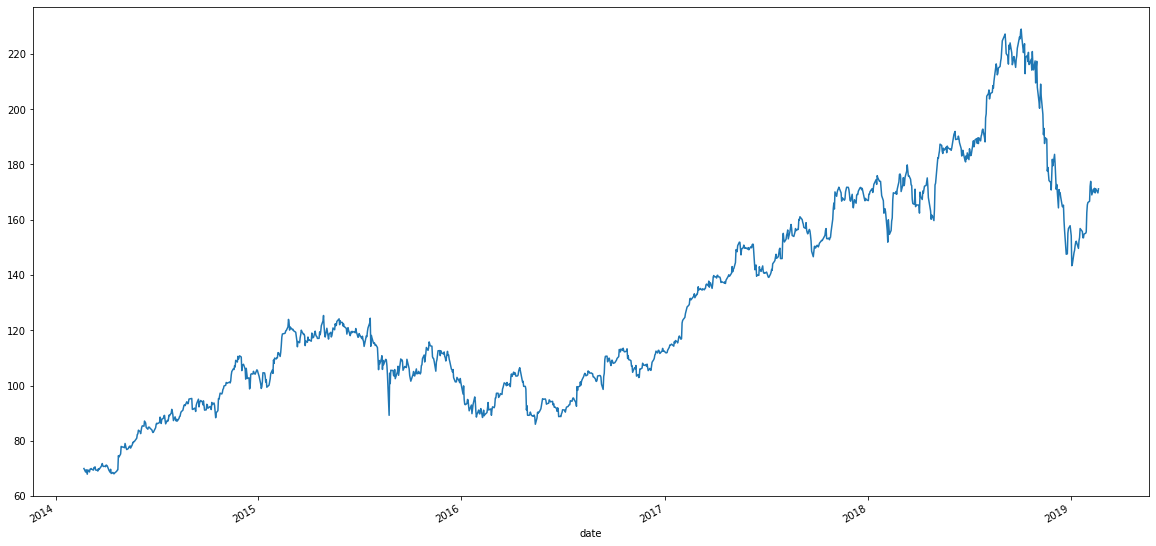

In [ ]:
data['open'].plot(figsize=(20,10))

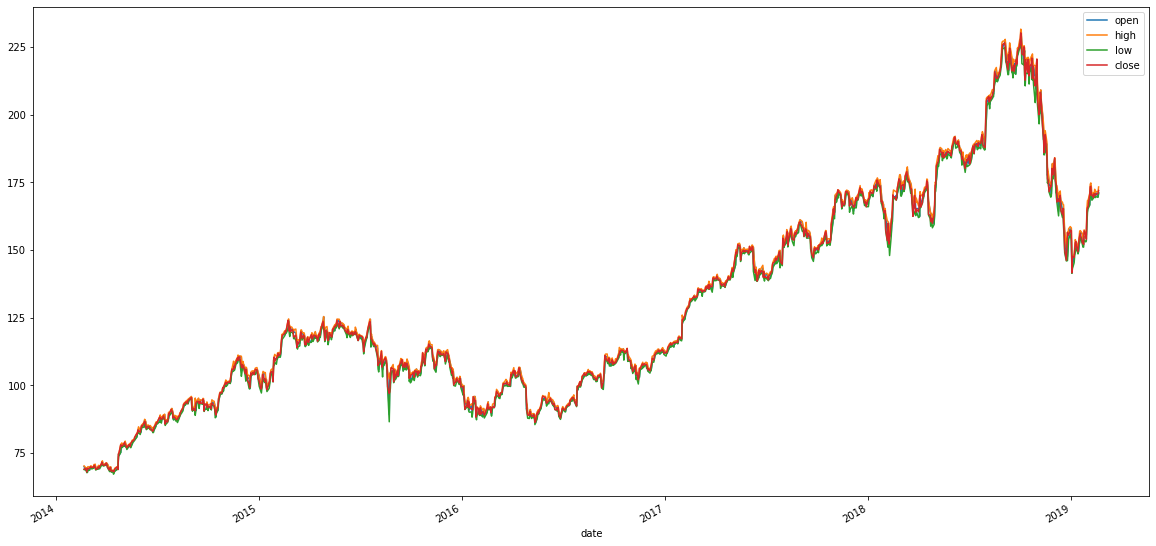

In [ ]:
data[['open','high','low','close']].plot(figsize=(20,10))

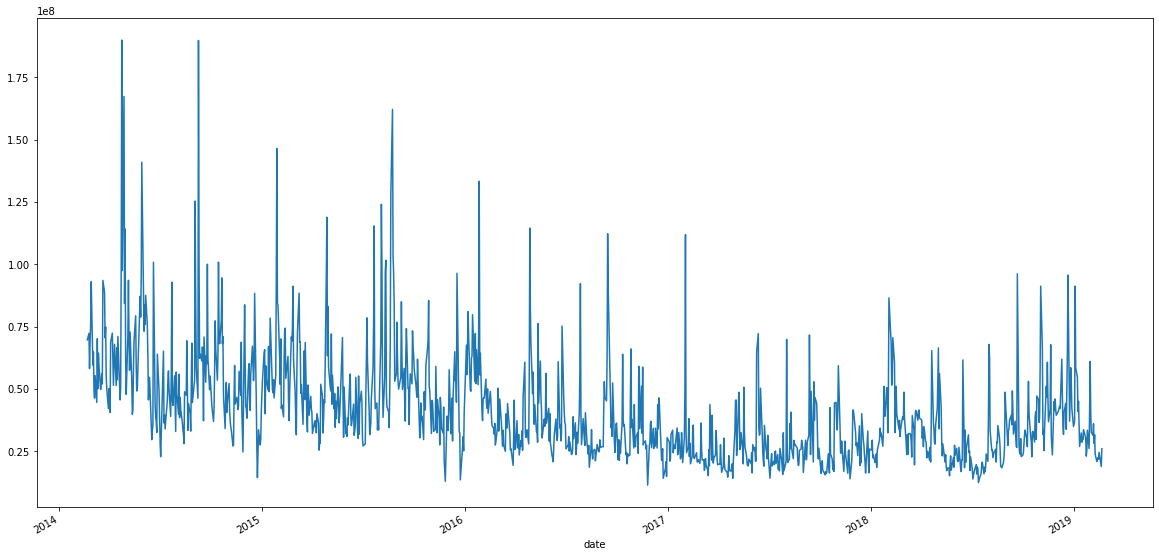

In [ ]:
data['volume'].plot(figsize=(20,10))

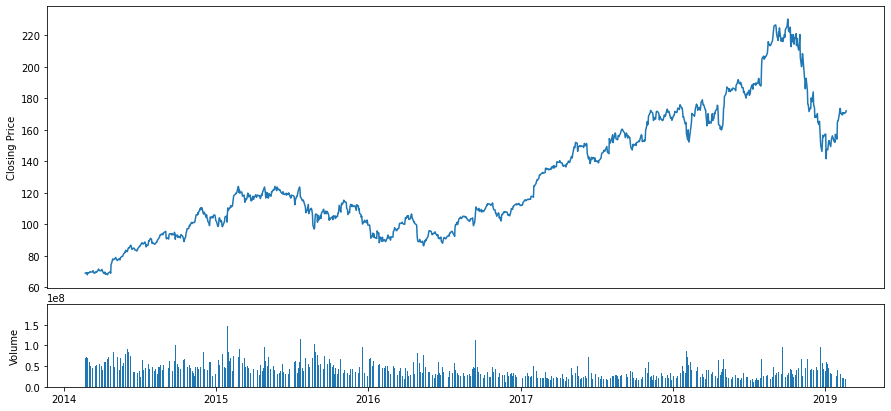

In [ ]:
plt.figure(figsize=(15,7))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
top.plot(data.index, data['close']) 
bottom.bar(data.index, data['volume']) 
 
# set the labels
top.axes.get_xaxis().set_visible(False)
top.set_ylabel('Closing Price')
bottom.set_ylabel('Volume');

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


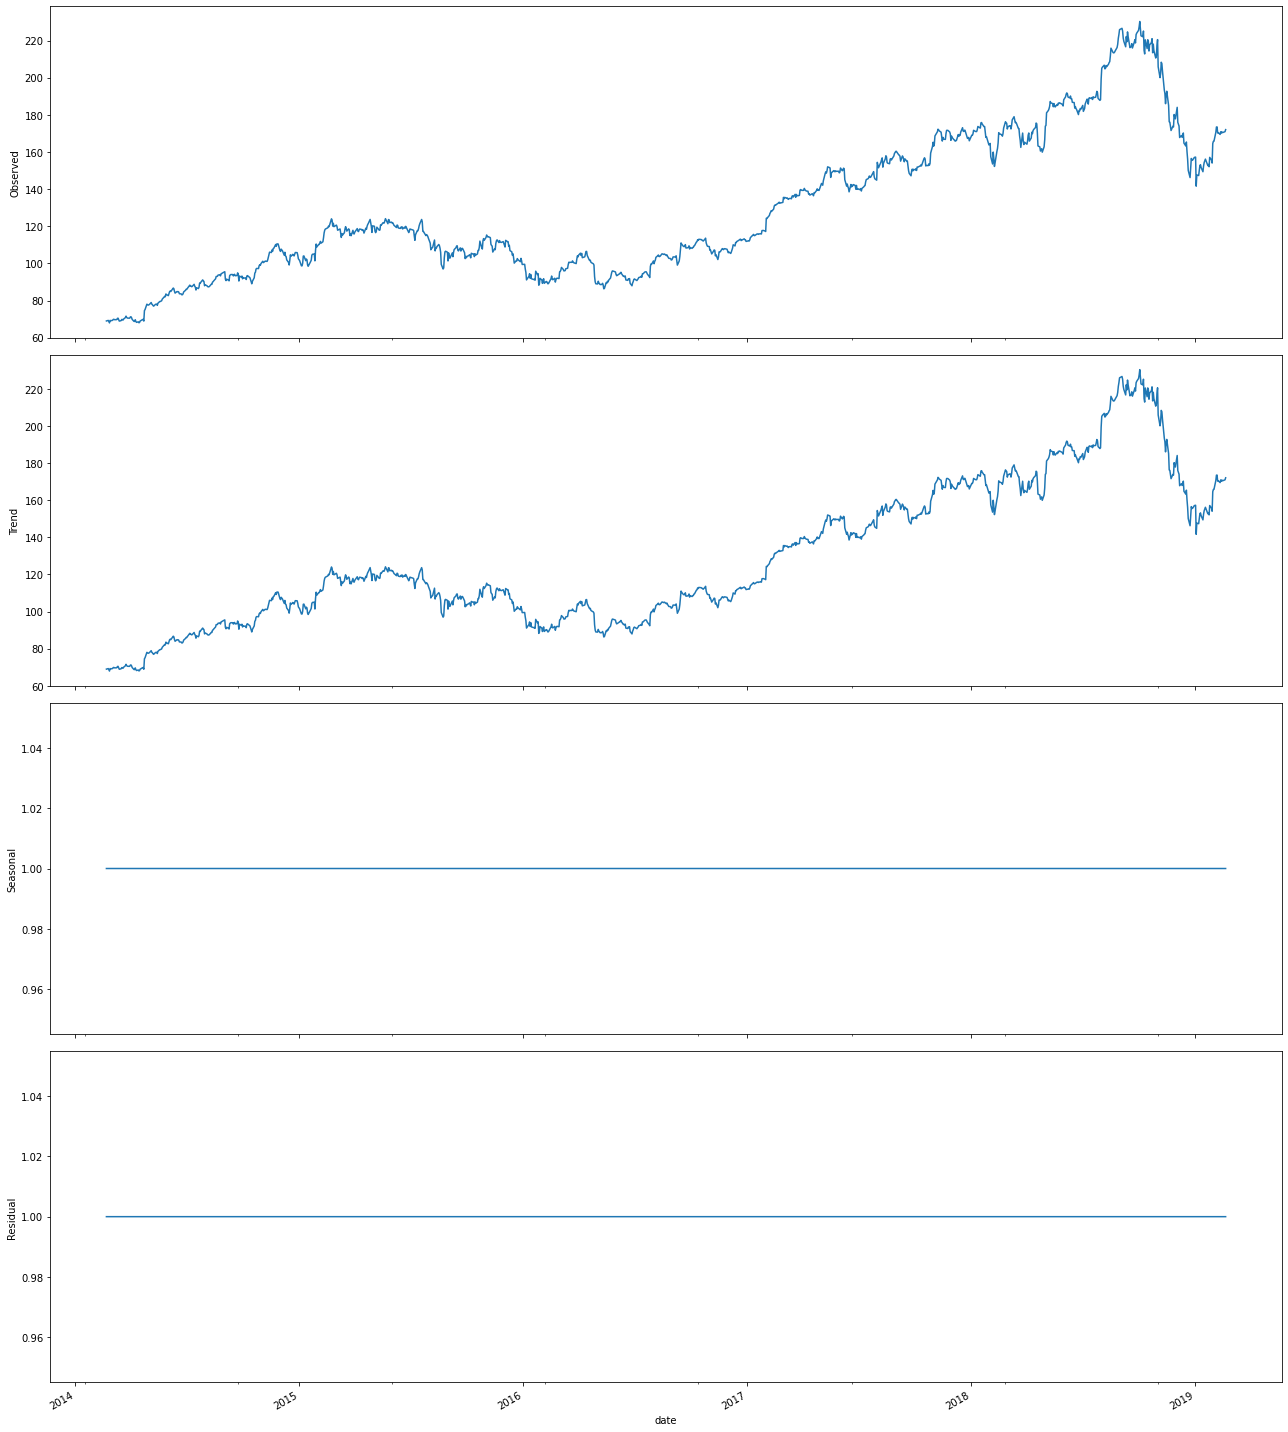

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 20
decomposition = sm.tsa.seasonal_decompose(data['close'], model='multiplicative', freq=1)
fig = decomposition.plot()
plt.show()

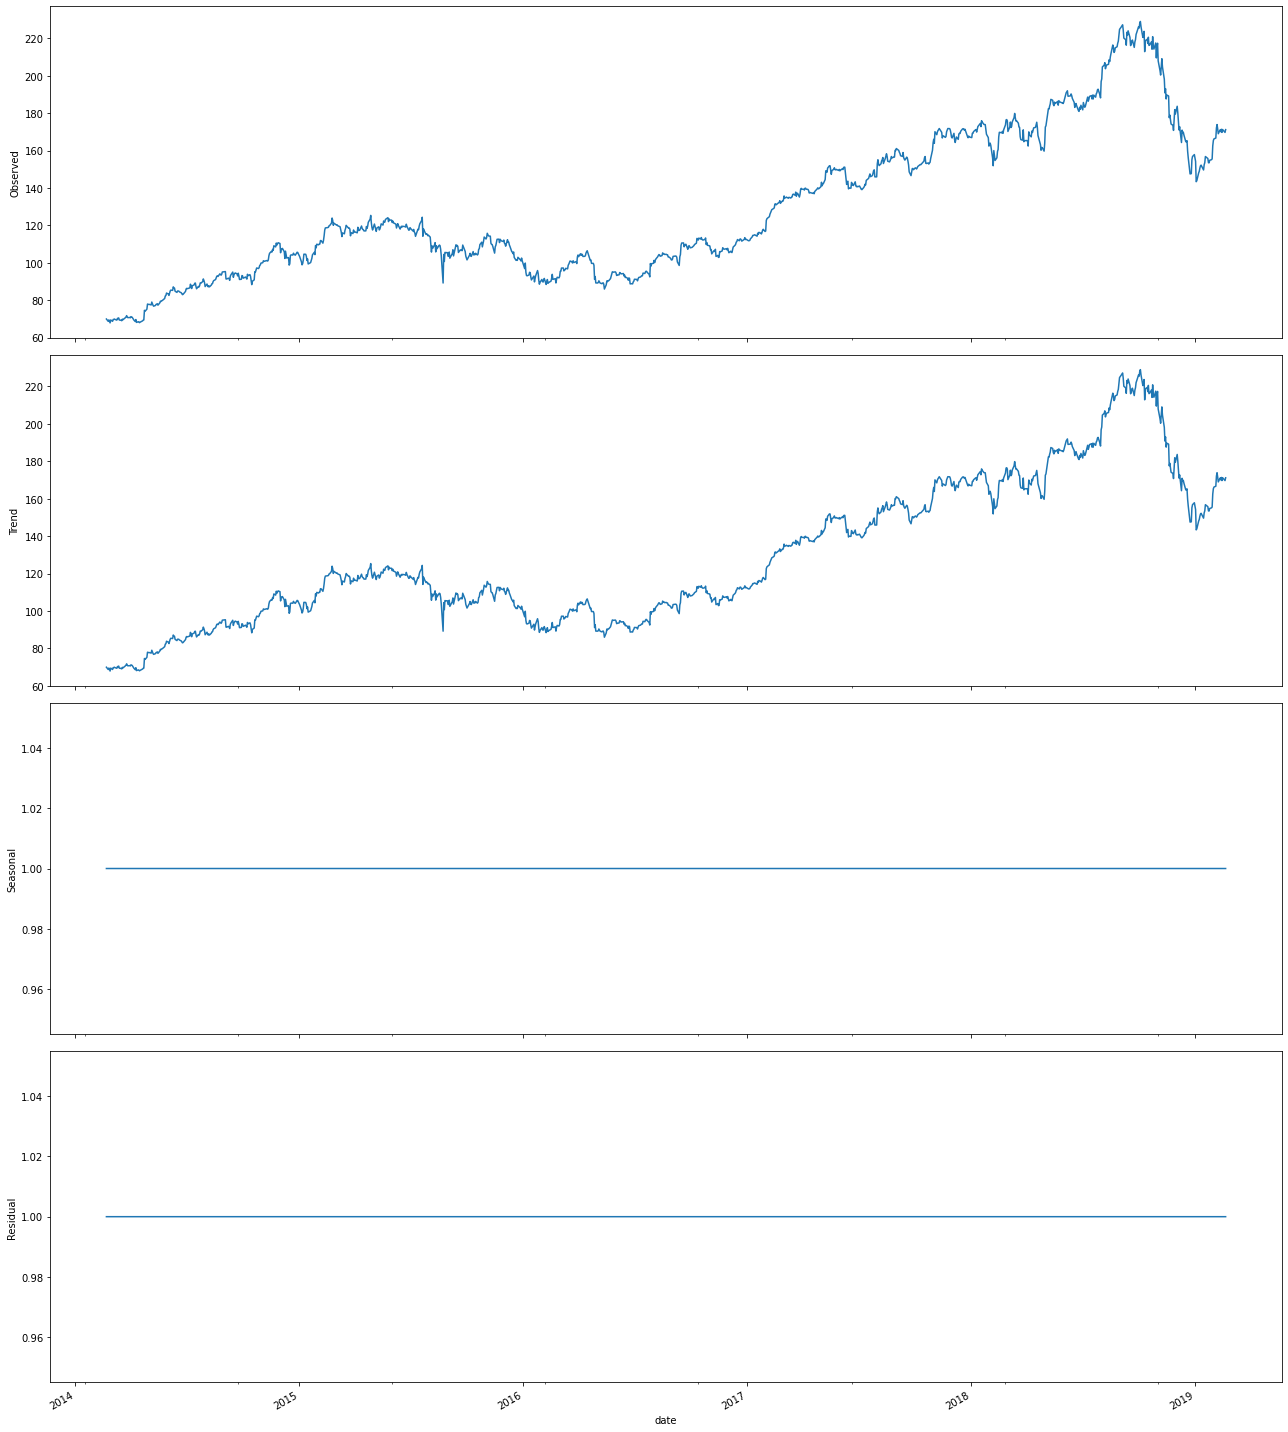

In [ ]:
rcParams['figure.figsize'] = 18, 20
decomposition = sm.tsa.seasonal_decompose(data['open'], model='multiplicative', freq=1)
fig = decomposition.plot()
plt.show()

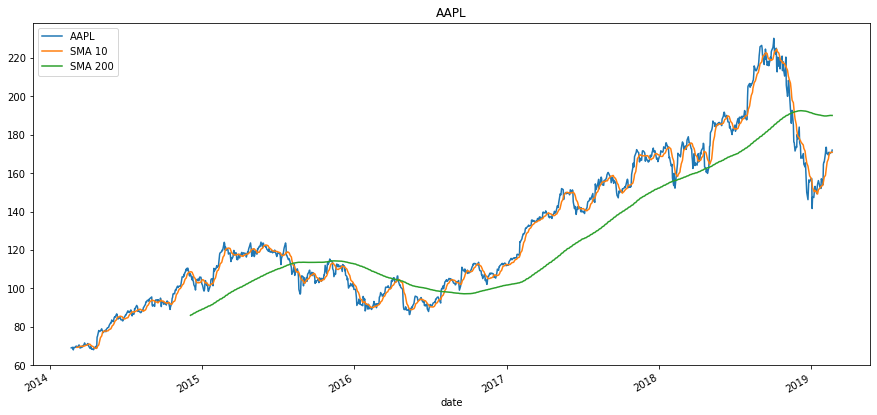

In [ ]:
# simple moving averages
sma5 = data['open'].rolling(10).mean() #5 days
sma200 = data['open'].rolling(200).mean() #100 days
 
AAPL_sma = pd.DataFrame({'AAPL': data['close'], 'SMA 10': sma5, 'SMA 200': sma200})
AAPL_sma.plot(figsize=(15, 7), legend=True, title='AAPL');

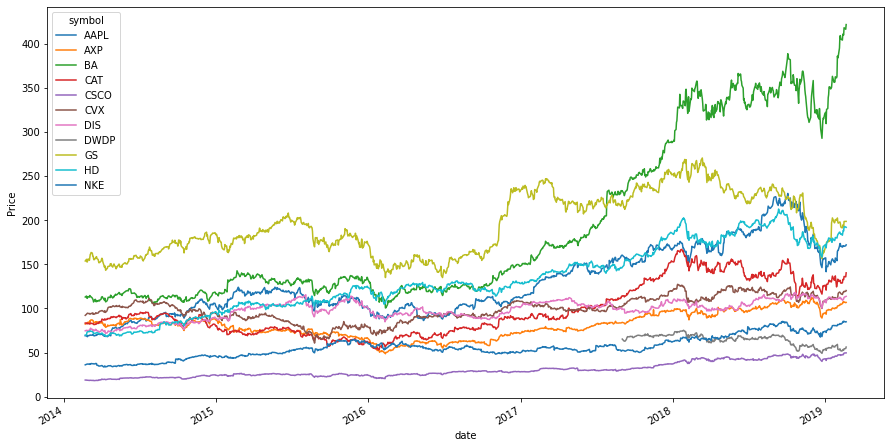

In [ ]:
df2.plot(figsize=(15,8))
plt.ylabel('Price');

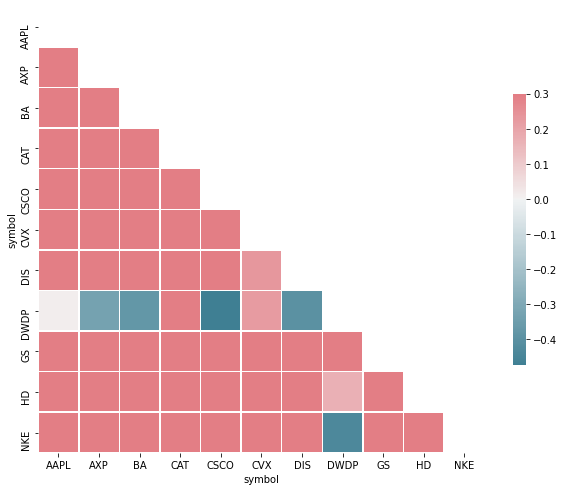

In [ ]:

# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [ ]:
data.shape

(1258, 6)

In [ ]:
data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'change'], dtype='object')

In [ ]:
lags = pd.DataFrame()
for i in range(10,0,-1):
    lags['t-'+str(i)] = data["open"].shift(i)
    lags['t'] = data['open'].values
lags = lags[10:]

In [ ]:
lags

,t-10,t,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
date,,,,,,,,,,,
2014-03-07,69.9727,69.7491,68.7063,69.5245,68.7667,67.9170,69.4851,68.7417,69.7372,69.7267,69.9723
2014-03-10,68.7063,69.3905,69.5245,68.7667,67.9170,69.4851,68.7417,69.7372,69.7267,69.9723,69.7491
2014-03-11,69.5245,70.3217,68.7667,67.9170,69.4851,68.7417,69.7372,69.7267,69.9723,69.7491,69.3905
2014-03-12,68.7667,70.1982,67.9170,69.4851,68.7417,69.7372,69.7267,69.9723,69.7491,69.3905,70.3217
2014-03-13,67.9170,70.5830,69.4851,68.7417,69.7372,69.7267,69.9723,69.7491,69.3905,70.3217,70.1982
...,...,...,...,...,...,...,...,...,...,...,...
2019-02-13,162.5528,171.3900,165.4005,166.2469,166.6950,172.1217,173.9041,171.6637,168.9900,171.0500,170.1000
2019-02-14,165.4005,169.7100,166.2469,166.6950,172.1217,173.9041,171.6637,168.9900,171.0500,170.1000,171.3900
2019-02-15,166.2469,171.2500,166.6950,172.1217,173.9041,171.6637,168.9900,171.0500,170.1000,171.3900,169.7100


In [ ]:
array = lags.values
X= array[:,0:-1]
y = array[:,-1]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=1200, random_state=1,min_samples_leaf=1,min_samples_split=2,max_features='auto',max_depth=15)
model.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1200, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
import plotly.graph_objects as go
names = lags.columns
fig = go.Figure(data=[go.Bar(
            x=lags.columns, y=model.feature_importances_,
            text=model.feature_importances_,
            textposition='auto',)])

fig.show()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(RandomForestRegressor(n_estimators=1200, random_state=1,min_samples_leaf=1,min_samples_split=2,max_features='auto',max_depth=15), 4)
fit = rfe.fit(X, y)
names = lags.columns
columns=[]
for i in range(len(fit.support_)):
    if fit.support_[i]:
        columns.append(names[i])

print("Columns with predictive power:", columns )

Columns with predictive power: ['t-10', 't', 't-4', 't-2']


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
result = seasonal_decompose(data, model='additive', freq=1)
fig = go.Figure()
fig.add_trace(go.Scatter(x=result.seasonal.index, y=result.seasonal.values, mode='lines', name='Seasonal'))

In [ ]:
columns=data.columns
data_mean=pd.DataFrame(columns=columns)
for col in columns:
    data_mean[col] = data[col].rolling(window = 4).mean()
data_mean = data_mean.dropna()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['open'], mode='lines', name='open'))
fig.add_trace(go.Scatter(x=data.index, y=data_mean['open'], mode='lines', name='open- Rolling Mean'))

In [ ]:
df_forecasting=pd.DataFrame(data["open"])
df_forecasting["open_diff"] = df_forecasting["open"].diff()
for i in range(4,0,-1):
    df_forecasting['t-'+str(i)] = df_forecasting["open"].shift(i)
df_forecasting=df_forecasting.dropna()
df_forecasting["open_rolling"] = df_forecasting["open"].rolling(window = 4).mean()
df_forecasting= df_forecasting.dropna()

In [ ]:
df_forecasting

,open,open_diff,t-4,t-3,t-2,t-1,open_rolling
date,,,,,,,
2014-03-04,69.7372,0.9955,68.7667,67.9170,69.4851,68.7417,68.970250
2014-03-05,69.7267,-0.0105,67.9170,69.4851,68.7417,69.7372,69.422675
2014-03-06,69.9723,0.2456,69.4851,68.7417,69.7372,69.7267,69.544475
2014-03-07,69.7491,-0.2232,68.7417,69.7372,69.7267,69.9723,69.796325
2014-03-10,69.3905,-0.3586,69.7372,69.7267,69.9723,69.7491,69.709650
...,...,...,...,...,...,...,...
2019-02-13,171.3900,1.2900,171.6637,168.9900,171.0500,170.1000,170.382500
2019-02-14,169.7100,-1.6800,168.9900,171.0500,170.1000,171.3900,170.562500
2019-02-15,171.2500,1.5400,171.0500,170.1000,171.3900,169.7100,170.612500


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
x=df_forecasting.iloc[:,0:5]
y=df_forecasting.iloc[:,5]
x_train, x_valid = x[0:943], x[944:]
y_train, y_valid = y[0:943], y[944:]

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV

In [ ]:
time_split = TimeSeriesSplit(n_splits=10)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

random_grid = {'n_estimators': [1200],
               'max_features': ['auto'],
               'max_depth': [15],
               'min_samples_split': [2],
               'min_samples_leaf': [1]}

rf = RandomForestRegressor(random_state=1)
grid_cv_dtm = GridSearchCV(rf, random_grid, cv=time_split)
grid_cv_dtm.fit(x_train,y_train)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose

In [ ]:
df = pd.DataFrame(data=grid_cv_dtm.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,2.861317,0.750817,0.109571,0.007266,15,auto,1,2,1200,"{'max_depth': 15, 'max_features': 'auto', 'min...",-1.718818,-1.425368,0.796258,0.797395,0.978253,0.976749,0.960137,0.595479,-2.124042,-1.198589,-0.136254,1.233121,1


In [ ]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::-0.13625442777399646
Best Hyperparameters::
{'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1200}


In [ ]:
# Checking the training model scores
r2_scores = cross_val_score(grid_cv_dtm.best_estimator_, x_train,y_train, cv=time_split)
mse_scores = cross_val_score(grid_cv_dtm.best_estimator_, x_train,y_train, cv=time_split,scoring='neg_mean_squared_error')
print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(abs(np.mean(mse_scores))))

avg R-squared::-0.136
MSE::38.061


In [ ]:
# Create the random grid
random_grid = {"n_neighbors":[50,60,70,80],
}
rf = KNeighborsRegressor()
grid_cv_dtm = GridSearchCV(rf, random_grid,cv=time_split)
grid_cv_dtm.fit(x_train,y_train)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
             error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [50, 60, 70, 80]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
df = pd.DataFrame(data=grid_cv_dtm.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002631,0.001047,0.003048,0.000822,50,{'n_neighbors': 50},-6.749527,-4.271664,-6.638901,0.655391,0.950079,0.942813,0.913463,0.448103,-8.829804,-2.624494,-2.520454,3.639520,1
1,0.002415,0.000609,0.002590,0.000412,60,{'n_neighbors': 60},-8.987080,-4.597691,-10.498883,0.625084,0.947590,0.940125,0.907696,0.420382,-10.722931,-3.073942,-3.403965,4.731455,2
2,0.002269,0.000251,0.002599,0.000247,70,{'n_neighbors': 70},-11.493856,-5.011398,-14.641942,0.601547,0.946383,0.936392,0.900747,0.400258,-12.187110,-3.523933,-4.307291,5.917190,3
3,0.002235,0.000232,0.002745,0.000270,80,{'n_neighbors': 80},-13.894513,-5.469768,-18.935734,0.615202,0.943533,0.931737,0.894582,0.376432,-13.553775,-3.975626,-5.206793,7.162543,4


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from keras.models import Sequential, load_model
from keras.layers.core import Dense,Flatten, Dropout, Activation
from keras.utils import np_utils
%matplotlib inline

In [ ]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_valid.shape)
print("y_test shape", y_valid.shape)

X_train shape (943, 5)
y_train shape (943,)
X_test shape (307, 5)
y_test shape (307,)


In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:

model =Sequential()

model.add(Dense(500, input_shape=(5,)))
model.add(BatchNormalization())


model.add(Dense(500))
model.add(BatchNormalization())


model.add(Dense(16))
model.add(BatchNormalization())


model.add(Dense(307))


In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 500)               3000      
_________________________________________________________________
batch_normalization_6 (Batch (None, 500)               2000      
_________________________________________________________________
dense_9 (Dense)              (None, 500)               250500    
_________________________________________________________________
batch_normalization_7 (Batch (None, 500)               2000      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                8016      
_________________________________________________________________
batch_normalization_8 (Batch (None, 16)                64        
_________________________________________________________________
dense_11 (Dense)             (None, 307)              

In [ ]:
# training the model and saving metrics in history
history = model.fit(x_train,y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(x_valid,y_valid))

Epoch 1/20
8/8 - 4s - loss: 927.7506 - accuracy: 0.0000e+00 - val_loss: -1.0668e+02 - val_accuracy: 0.0000e+00
Epoch 2/20
8/8 - 0s - loss: 893.4614 - accuracy: 0.0000e+00 - val_loss: -2.3610e+02 - val_accuracy: 0.0000e+00
Epoch 3/20
8/8 - 0s - loss: 857.9048 - accuracy: 0.0000e+00 - val_loss: -2.2776e+02 - val_accuracy: 0.0000e+00
Epoch 4/20
8/8 - 0s - loss: 824.7610 - accuracy: 0.0000e+00 - val_loss: -6.4463e+01 - val_accuracy: 0.0000e+00
Epoch 5/20
8/8 - 0s - loss: 805.6335 - accuracy: 0.0000e+00 - val_loss: -6.2420e+01 - val_accuracy: 0.0000e+00
Epoch 6/20
8/8 - 0s - loss: 775.8464 - accuracy: 0.0000e+00 - val_loss: -2.4686e+01 - val_accuracy: 0.0000e+00
Epoch 7/20
8/8 - 0s - loss: 741.4994 - accuracy: 0.0000e+00 - val_loss: 34.4517 - val_accuracy: 0.0000e+00
Epoch 8/20
8/8 - 0s - loss: 698.9778 - accuracy: 0.0000e+00 - val_loss: 16.2985 - val_accuracy: 0.0000e+00
Epoch 9/20
8/8 - 0s - loss: 662.3237 - accuracy: 0.0000e+00 - val_loss: 34.0836 - val_accuracy: 0.0000e+00
Epoch 10/20
8

In [ ]:

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
